In [1]:
import sys, os, h5py
import numpy as np
import tensorflow as tf
# from rich.console import Console
# console = Console()

sys.path.append(r"/Users/sachagreenfield/Desktop/GitHub/")
from qnl_trajectories.analysis import data_analysis
from utils import *
from vanilla_lstm import *

dark_mode_compatible(dark_mode_color=r'#86888A')

In [2]:


# NOTE: Note that most of the settings below must be equal to the settings in prep.py
# Path that contains the training/validation dataset.
filepath = r"data/cts_rabi_amp_0/prep_Y"
# last_timestep determines the length of trajectories used for training in units of strong_ro_dt.
# Must be <= the last strong readout point
last_timestep = 39
mask_value = -1.0 # This is the mask value for the data, not the missing labels
num_features = 2 # I and Q
strong_ro_dt = 200e-9 # Time interval for strong readout in the dataset in seconds

# console.print("Loading data...", style="bold red")

# Load the data from the pickle files.
dX = data_analysis.load_data(os.path.join(filepath, 'meas_X'), last_timestep=last_timestep, qubit='Q6')
dY = data_analysis.load_data(os.path.join(filepath, 'meas_Y'), last_timestep=last_timestep, qubit='Q6')
dZ = data_analysis.load_data(os.path.join(filepath, 'meas_Z'), last_timestep=last_timestep, qubit='Q6')


/Users/sachagreenfield/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator GaussianMixture from version 0.20.0 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [3]:
f't_{2}'

't_2'

In [11]:
last_timestep

39

In [39]:
dY['t_1']['final_ro_results']

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [34]:
dY['t_1']['N_reps']

9472

In [31]:
dY['t_1']['I'].shape

(9472, 5)

In [44]:
dY['t_0']['strong_ro_classifications'].shape

(9495,)

In [98]:
t = 8
dX[f't_{t}']['Tm']

1.6000000000000001e-06

In [99]:
dX[f't_{t}']['dt']

1.6000000000000001e-06

In [101]:
len(dX[f't_{t}']['strong_ro_classifications'])

9554

In [103]:
len(dX[f't_{t}']['final_ro_results'])

9554

In [111]:
truthval=True
for i in range(len(dX[f't_{t}']['final_ro_results'])):
    if dX[f't_{t}']['strong_ro_classifications'][i]!=dX[f't_{t}']['final_ro_results'][i]:
        truthval=False



In [114]:
dX[f't_{t}']['strong_ro_classifications'][1]

0

In [113]:
dX[f't_{t}']['final_ro_results'][1]

0

In [95]:
t=5
len(dX[f't_{t}']['strong_ro_classifications']) == dX[f't_{t}']['N_reps']

True

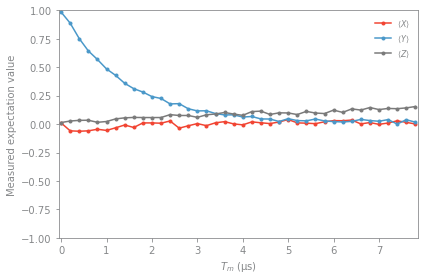

In [4]:
# Get the expectation value from the data containers for each measurement axis.
Tm, expX, expY, expZ = data_analysis.plot_average_trajectories(dX, dY, dZ,
                                                               timesteps=np.arange(0, last_timestep+1),
                                                               fit_curves=[],
                                                               artificial_detuning=False,
                                                               savepath=None)


In [5]:
expX = np.array(expX)
expY = np.array(expY)
expZ = np.array(expZ)

dt = dZ['t_0']['integration_time']
timesteps = range(1, last_timestep+1)
tfinal = dZ[f't_{timesteps[-1]}']['dt']

print("Loaded data...")

# Extract the I and Q voltage records and apply a scaling
rawX_I, rawX_Q, labelsX, reps_per_timestepX = get_data(dX, 'X', timesteps, scaling=0.005)
rawY_I, rawY_Q, labelsY, reps_per_timestepY = get_data(dY, 'Y', timesteps, scaling=0.005)
rawZ_I, rawZ_Q, labelsZ, reps_per_timestepZ = get_data(dZ, 'Z', timesteps, scaling=0.005)

Loaded data...


In [65]:
reps_per_timestepX

[9466,
 9444,
 9468,
 9533,
 9483,
 9549,
 9497,
 9554,
 9529,
 9466,
 9523,
 9465,
 9508,
 9539,
 9535,
 9477,
 9481,
 9451,
 9439,
 9422,
 9461,
 9485,
 9444,
 9438,
 9448,
 9499,
 9475,
 9439,
 9444,
 9464,
 9458,
 9485,
 9486,
 9514,
 9415,
 9489,
 9448,
 9480,
 9415]

In [16]:
lmv=-1
one_hot = np.array([[lmv, lmv, lmv, lmv, 1, 0],
                            [lmv, lmv, lmv, lmv, 0, 1]])

In [29]:
t=1
data_dict = dX
np.shape(data_dict[f't_{t}']['I'])[0]==data_dict[f't_{t}']['N_reps']
take=data_dict[f't_{t}']['N_reps']

In [45]:
n = 1
data_dict[f't_{t}']['I'][n,:]

array([-112.84367371,  -53.42382812,   47.9151001 , -323.34121704,
        105.11811829])

In [64]:
rawX_I[200000]

[0.2695241928100586,
 0.6577510070800782,
 -0.02573709011077881,
 -0.633536491394043,
 0.20333700180053713,
 0.5061943435668945,
 -0.6401942443847657,
 0.5957784271240234,
 0.36564628601074217,
 0.05796713352203369,
 0.6521488189697265,
 1.11728759765625,
 -0.007433379888534546,
 0.6579753112792969,
 -0.599661865234375,
 -0.41748523712158203,
 -0.24174947738647462,
 0.30988290786743167,
 -0.00117767333984375,
 -0.10646937370300293,
 0.9967925262451172,
 0.328330078125,
 1.7426400756835938,
 -0.3252637481689453,
 0.49657257080078127,
 -0.009311454892158509,
 0.190042781829834,
 -0.144266300201416,
 -0.21058889389038085,
 0.02057684421539307,
 -0.09444473266601562,
 -0.1525406837463379,
 -0.5929792022705078,
 -0.12108830451965333,
 1.4386410522460937,
 1.0880283355712892,
 -0.257609977722168,
 -0.5012385940551758,
 -0.6514552307128907,
 -0.3327114486694336,
 0.1348926067352295,
 0.11191090583801269,
 0.4913940811157227,
 -0.7950865936279297,
 0.4391082763671875,
 0.018124465942382813,
 -

In [50]:
labelsX.shape

(369616, 6)

In [34]:
np.array(data_dict[f't_{t}']['strong_ro_classifications'], dtype=int)[:take]

array([1, 0, 1, ..., 1, 0, 1])

In [35]:
testarr=one_hot[np.array(data_dict[f't_{t}']['strong_ro_classifications'], dtype=int)[:take]]

In [36]:
testarr.shape

(9466, 6)

In [37]:
testarr

array([[-1, -1, -1, -1,  0,  1],
       [-1, -1, -1, -1,  1,  0],
       [-1, -1, -1, -1,  0,  1],
       ...,
       [-1, -1, -1, -1,  0,  1],
       [-1, -1, -1, -1,  1,  0],
       [-1, -1, -1, -1,  0,  1]])

In [19]:
N_reps = np.shape(dX[f't_0']['I'])[0]

KeyError: 'I'

In [15]:
len(rawX_I)

369616

In [10]:
np.sum(reps_per_timestepX)

369616

In [12]:
reps_per_timestepX[39]

IndexError: list index out of range

In [11]:
len(reps_per_timestepX)

39

In [51]:
# Append I and Q voltage records from different measurement axes
raw_I = rawX_I + rawY_I + rawZ_I
raw_Q = rawX_Q + rawY_Q + rawZ_Q
reps_per_timestep = reps_per_timestepX + reps_per_timestepY + reps_per_timestepZ
labels = np.vstack((np.vstack((labelsX, labelsY)), labelsZ))
meas_ax = ['X'] * np.sum(reps_per_timestepX) + ['Y'] * np.sum(reps_per_timestepY) + \
          ['Z'] * np.sum(reps_per_timestepZ)


In [60]:
raw_I[1]

[-0.5642183685302734,
 -0.26711914062500003,
 0.23957550048828125,
 -1.616706085205078,
 0.5255905914306641]

In [55]:
len(meas_ax)

1108196

In [59]:

# By default, this will pad using 0s; it is configurable via the "value" parameter.
# Note that you could "pre" padding (at the beginning) or "post" padding (at the end).
# We recommend using "post" padding when working with RNN layers (in order to be able to use the
# CuDNN implementation of the layers).
padded_I = tf.keras.preprocessing.sequence.pad_sequences(raw_I, padding='post',
                                                         dtype='float32', value=mask_value)
padded_Q = tf.keras.preprocessing.sequence.pad_sequences(raw_Q, padding='post',
                                                         dtype='float32', value=mask_value)


In [69]:
len(raw_I[-1])

195

In [66]:
padded_I.shape

(1108196, 195)

In [70]:

batch_size, sequence_length = np.shape(padded_I)

# Pad the labels such that they can be processed by the NN later
padded_labels = pad_labels(labels, (int(strong_ro_dt/dt) * np.array(timesteps)).tolist() * 3, reps_per_timestep, mask_value)


In [71]:
labels.shape

(1108196, 6)

In [74]:
labels[-1]

array([-1, -1, -1, -1,  1,  0])

In [82]:
padded_labels[1][4]

array([ 1.,  0., -1., -1., -1., -1.])

In [72]:
padded_labels.shape

(1108196, 195, 6)

In [ ]:

# Split validation and data deterministically so we can compare results from run to run
train_x, train_y, valid_x, valid_y = split_data_same_each_time(padded_I.astype(np.float32), padded_Q.astype(np.float32),
                                                               padded_labels, 0.90, start_idx=0)


In [ ]:

train_msk = train_x != mask_value
valid_msk = valid_x != mask_value
all_data_msk = padded_I != mask_value

all_time_series_lengths = np.sum(all_data_msk, axis=1)
valid_time_series_lengths = np.sum(valid_msk[:, :, 0], axis=1)
train_time_series_lengths = np.sum(train_msk[:, :, 0], axis=1)

# Save a pre-processed file as an h5 file. Note these files can be quite large, typ. 15 GB.
console.print(f"Saving processed data to {filepath}...", style="bold red")
with h5py.File(os.path.join(filepath, "training_validation_split.h5"), 'w') as f:
    f.create_dataset("train_x", data=train_x)
    f.create_dataset("train_y", data=train_y)
    f.create_dataset("valid_x", data=valid_x)
    f.create_dataset("valid_y", data=valid_y)

    f.create_dataset("Tm", data=Tm[np.array(timesteps)])
    f.create_dataset("expX", data=expX[np.array(timesteps)])
    f.create_dataset("expY", data=expY[np.array(timesteps)])
    f.create_dataset("expZ", data=expZ[np.array(timesteps)])

    f.create_dataset("all_time_series_lengths", data=all_time_series_lengths)
    f.create_dataset("valid_time_series_lengths", data=valid_time_series_lengths)
    f.create_dataset("train_time_series_lengths", data=train_time_series_lengths)

    f.create_dataset("dt", data=np.array([dt]))
    f.create_dataset("tfinal", data=np.array([tfinal]))